In [1]:
import os

os.environ["KERAS_BACKEND"] = "jax"


import numpy as np
import jax.numpy as jnp
import jax.random as jax_random
import pandas as pd

import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Conv2D, Reshape, MaxPool2D
from keras.losses import (
    MeanSquaredError,
    BinaryCrossentropy,
    SparseCategoricalCrossentropy,
)
from keras.optimizers import SGD, RMSprop
from keras.metrics import SparseCategoricalAccuracy

In [2]:
import matplotlib.pyplot as plt

In [3]:
import torchvision
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

to_numpy_array = lambda img: np.array(img, dtype=np.float32) / 255.0

mnist_data_train = torchvision.datasets.MNIST(
    "./data",
    train=True,
    download=True,
    transform=to_numpy_array,
)
mnist_data_test = torchvision.datasets.MNIST(
    "./data",
    train=False,
    download=True,
    transform=to_numpy_array,
)
x_example, y_example = mnist_data_train[0]

In [4]:
print(type(x_example), x_example.shape)

<class 'numpy.ndarray'> (28, 28)


In [5]:
x_example.max()

1.0

In [6]:
B = 32
mnist_train_loader = DataLoader(mnist_data_train, batch_size=B, shuffle=True)
mnist_test_loader = DataLoader(mnist_data_test, batch_size=B)

In [7]:
# How many values are in the input? We use this to help determine the size of subsequent layers
D = 28 * 28  # 28 * 28 images
# How many channels are in the input?
C = 1
# How many classes are there?
classes = 10
# How many filters should we use
filters = 16
# how large should our filters be?
K = 3

In [8]:
x_shape = x_example.shape

In [9]:
model_linear = Sequential(
    [
        Input(shape=x_shape),
        Flatten(),
        Dense(256, activation="tanh"),
        Dense(classes, activation="softmax"),
    ]
)

model_linear.compile(
    optimizer="SGD",
    loss=SparseCategoricalCrossentropy(),
    metrics=[SparseCategoricalAccuracy()],
)
fc_results = model_linear.fit(mnist_train_loader, epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 914us/step - loss: 0.9051 - sparse_categorical_accuracy: 0.7665
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 869us/step - loss: 0.3677 - sparse_categorical_accuracy: 0.8978
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 876us/step - loss: 0.3149 - sparse_categorical_accuracy: 0.9107
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 880us/step - loss: 0.2884 - sparse_categorical_accuracy: 0.9179
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 881us/step - loss: 0.2757 - sparse_categorical_accuracy: 0.9219
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 849us/step - loss: 0.2673 - sparse_categorical_accuracy: 0.9249
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 865us/step - loss: 0.2499 - sparse_categorical_accuracy: 0.9298
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 854us/step - loss: 0.2356 - sparse_categorical_accuracy: 0.9334
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 912us/step - loss: 0.2258 - sparse_categorical_accuracy: 0.9368
Epoch 10/20
1875/18

In [10]:
(1, *x_shape)

(1, 28, 28)

In [11]:
model_cnn = Sequential(
    [
        Input(shape=x_shape),
        Reshape((1, *x_shape)),
        Conv2D(
            filters=filters,
            kernel_size=K,
            padding="same",
            data_format="channels_first",
            activation="tanh",
        ),
        Flatten(),
        Dense(classes, activation="softmax"),
    ]
)

model_cnn.compile(
    optimizer="SGD",
    loss=SparseCategoricalCrossentropy(),
    metrics=[SparseCategoricalAccuracy()],
)
cnn_results = model_cnn.fit(mnist_train_loader, epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.7027 - sparse_categorical_accuracy: 0.8202
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2975 - sparse_categorical_accuracy: 0.9138
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2775 - sparse_categorical_accuracy: 0.9199
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2684 - sparse_categorical_accuracy: 0.9235
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2554 - sparse_categorical_accuracy: 0.9283
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2352 - sparse_categorical_accuracy: 0.9325
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2307 - sparse_categorical_accuracy: 0.9353
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2211 - sparse_categorical_accuracy: 0.9396
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2050 - sparse_categorical_accuracy: 0.9420
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━

<Axes: xlabel='epochs', ylabel='Accuracy'>

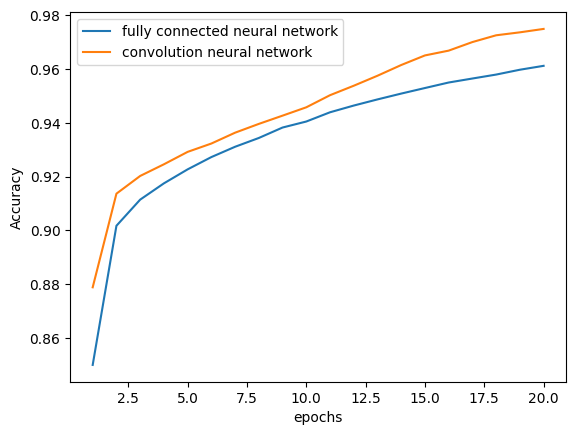

In [12]:
pd.DataFrame(
    {
        "epochs": np.arange(1, 21, 1),
        "fully connected neural network": fc_results.history[
            "sparse_categorical_accuracy"
        ],
        "convolution neural network": cnn_results.history[
            "sparse_categorical_accuracy"
        ],
    }
).set_index("epochs").plot(ylabel="Accuracy")

In [13]:
mnist_data_train[0][0].shape

(28, 28)

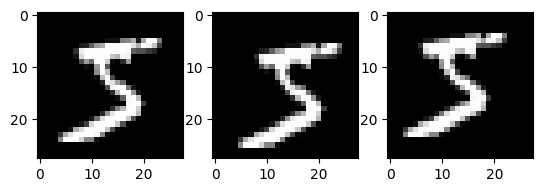

In [14]:
img_indx = 0
img, correct_class = mnist_data_train[img_indx]

# move to the lower right, then upper left
img_lr = np.roll(np.roll(img, 1, axis=1), 1, axis=0)
img_ul = np.roll(np.roll(img, -1, axis=1), -1, axis=0)
# plot the images
f, axarr = plt.subplots(1, 3)
axarr[0].imshow(img, cmap="gray")
axarr[1].imshow(img_lr, cmap="gray")
axarr[2].imshow(img_ul, cmap="gray")
plt.show()

In [15]:
img_pred = model_cnn.predict(img.reshape(1, 28, 28)).ravel()
img_lr_pred = model_cnn.predict(img_lr.reshape(1, 28, 28)).ravel()
img_ul_pred = model_cnn.predict(img_ul.reshape(1, 28, 28)).ravel()

print("Org Img Class {} Prob:         ".format(correct_class), img_pred[correct_class])
print(
    "Lower Right Img Class {} Prob: ".format(correct_class), img_lr_pred[correct_class]
)
print(
    "Uper Left Img Class {} Prob:   ".format(correct_class), img_ul_pred[correct_class]
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step
Org Img Class 5 Prob:          0.9211069
Lower Right Img Class 5 Prob:  0.72169876
Uper Left Img Class 5 Prob:    0.9329274


In [17]:
model_cnn_pool = Sequential(
    [
        Input(shape=x_shape),
        Reshape((1, *x_shape)),
        Conv2D(
            filters=filters,
            kernel_size=K,
            padding="same",
            data_format="channels_first",
            activation="tanh",
        ),
        Conv2D(
            filters=filters,
            kernel_size=K,
            padding="same",
            data_format="channels_first",
            activation="tanh",
        ),
        Conv2D(
            filters=filters,
            kernel_size=K,
            padding="same",
            data_format="channels_first",
            activation="tanh",
        ),
        MaxPool2D(pool_size=(2, 2)),
        Conv2D(
            filters=filters,
            kernel_size=K,
            padding="same",
            data_format="channels_first",
            activation="tanh",
        ),
        Conv2D(
            filters=filters,
            kernel_size=K,
            padding="same",
            data_format="channels_first",
            activation="tanh",
        ),
        Conv2D(
            filters=filters,
            kernel_size=K,
            padding="same",
            data_format="channels_first",
            activation="tanh",
        ),
        MaxPool2D(pool_size=(2, 2)),
        Flatten(),
        Dense(classes, activation="softmax"),
    ]
)

model_cnn_pool.compile(
    optimizer="SGD",
    loss=SparseCategoricalCrossentropy(),
    metrics=[SparseCategoricalAccuracy()],
)
cnn_pool_results = model_cnn_pool.fit(mnist_train_loader, epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 98s 52ms/step - loss: 0.8356 - sparse_categorical_accuracy: 0.7498
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - loss: 0.1629 - sparse_categorical_accuracy: 0.9539
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - loss: 0.1142 - sparse_categorical_accuracy: 0.9672
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - loss: 0.0933 - sparse_categorical_accuracy: 0.9736
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 32ms/step - loss: 0.0767 - sparse_categorical_accuracy: 0.9774
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - loss: 0.0706 - sparse_categorical_accuracy: 0.9807
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - loss: 0.0626 - sparse_categorical_accuracy: 0.9822
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - loss: 0.0563 - sparse_categorical_accuracy: 0.9841
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 986s 526ms/step - loss: 0.0565 - sparse_categorical_accuracy: 0.9840
Epoch 10/20
1875/

In [18]:
img_pred = model_cnn_pool.predict(img.reshape(1, 28, 28)).ravel()
img_lr_pred = model_cnn_pool.predict(img_lr.reshape(1, 28, 28)).ravel()
img_ul_pred = model_cnn_pool.predict(img_ul.reshape(1, 28, 28)).ravel()

print("Org Img Class {} Prob:         ".format(correct_class), img_pred[correct_class])
print(
    "Lower Right Img Class {} Prob: ".format(correct_class), img_lr_pred[correct_class]
)
print(
    "Uper Left Img Class {} Prob:   ".format(correct_class), img_ul_pred[correct_class]
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Org Img Class 5 Prob:          0.94532585
Lower Right Img Class 5 Prob:  0.8803822
Uper Left Img Class 5 Prob:    0.86138624


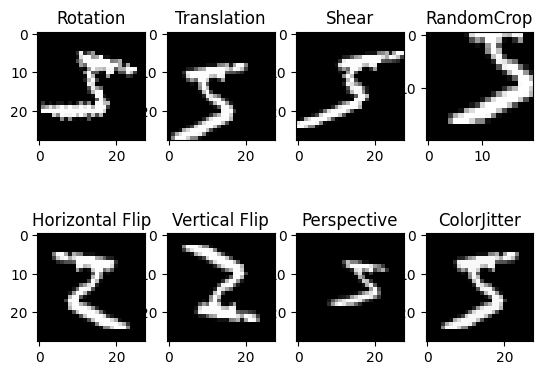

In [19]:
# Several built-in transformations, given some agressive values to make their impact more obvious.
sample_transforms = {
    "Rotation": transforms.RandomAffine(degrees=45),
    "Translation": transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    "Shear": transforms.RandomAffine(degrees=0, shear=45),
    "RandomCrop": transforms.RandomCrop((20, 20)),
    "Horizontal Flip": transforms.RandomHorizontalFlip(p=1.0),
    "Vertical Flip": transforms.RandomVerticalFlip(p=1.0),
    "Perspective": transforms.RandomPerspective(p=1.0),
    "ColorJitter": transforms.ColorJitter(brightness=0.9, contrast=0.9),
}
# Convert the Tensor image back to a PIL image using a transform
pil_img = transforms.ToPILImage()(img)
# Plot a randomy application of each transform
f, axarr = plt.subplots(2, 4)
for count, (name, t) in enumerate(sample_transforms.items()):
    row = count % 4
    col = count // 4
    axarr[col, row].imshow(t(pil_img), cmap="gray")
    axarr[col, row].set_title(name)
plt.show()

In [20]:
train_transform = transforms.Compose(
    [
        transforms.RandomAffine(degrees=5, translate=(0.05, 0.05), scale=(0.98, 1.02)),
        to_numpy_array,
    ]
)

test_transform = to_numpy_array

mnist_train_t = torchvision.datasets.MNIST(
    "./data", train=True, transform=train_transform
)
mnist_test_t = torchvision.datasets.MNIST(
    "./data", train=False, transform=test_transform
)
mnist_train_loader_t = DataLoader(mnist_train_t, shuffle=True, batch_size=B)
mnist_test_loader_t = DataLoader(mnist_test_t, batch_size=B)

In [21]:
model_cnn_pool = Sequential(
    [
        Input(shape=x_shape),
        Reshape((1, *x_shape)),
        Conv2D(
            filters=filters,
            kernel_size=K,
            padding="same",
            data_format="channels_first",
            activation="tanh",
        ),
        Conv2D(
            filters=filters,
            kernel_size=K,
            padding="same",
            data_format="channels_first",
            activation="tanh",
        ),
        Conv2D(
            filters=filters,
            kernel_size=K,
            padding="same",
            data_format="channels_first",
            activation="tanh",
        ),
        MaxPool2D(pool_size=(2, 2)),
        Conv2D(
            filters=filters,
            kernel_size=K,
            padding="same",
            data_format="channels_first",
            activation="tanh",
        ),
        Conv2D(
            filters=filters,
            kernel_size=K,
            padding="same",
            data_format="channels_first",
            activation="tanh",
        ),
        Conv2D(
            filters=filters,
            kernel_size=K,
            padding="same",
            data_format="channels_first",
            activation="tanh",
        ),
        MaxPool2D(pool_size=(2, 2)),
        Flatten(),
        Dense(classes, activation="softmax"),
    ]
)

model_cnn_pool.compile(
    optimizer="SGD",
    loss=SparseCategoricalCrossentropy(),
    metrics=[SparseCategoricalAccuracy()],
)
cnn_pool_with_argu_results = model_cnn_pool.fit(mnist_train_loader_t, epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - loss: 1.0588 - sparse_categorical_accuracy: 0.6758
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - loss: 0.1915 - sparse_categorical_accuracy: 0.9435
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - loss: 0.1401 - sparse_categorical_accuracy: 0.9582
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 24ms/step - loss: 0.1204 - sparse_categorical_accuracy: 0.9636
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - loss: 0.1046 - sparse_categorical_accuracy: 0.9679
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - loss: 0.0930 - sparse_categorical_accuracy: 0.9715
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - loss: 0.0836 - sparse_categorical_accuracy: 0.9752
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - loss: 0.0788 - sparse_categorical_accuracy: 0.9768
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - loss: 0.0759 - sparse_categorical_accuracy: 0.9767
Epoch 10/20
1875/18

<Axes: xlabel='epochs', ylabel='Accuracy'>

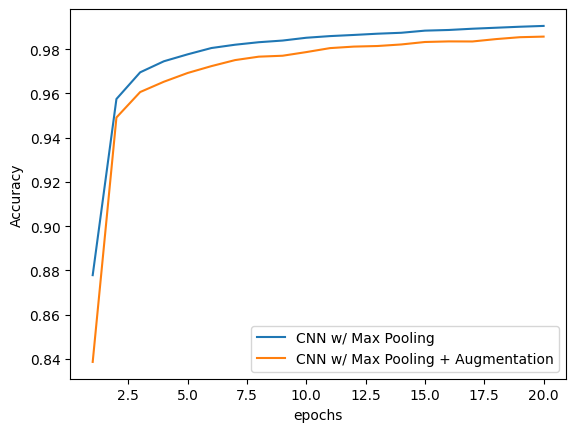

In [22]:
pd.DataFrame(
    {
        "epochs": np.arange(1, 21, 1),
        "CNN w/ Max Pooling": cnn_pool_results.history["sparse_categorical_accuracy"],
        "CNN w/ Max Pooling + Augmentation": cnn_pool_with_argu_results.history[
            "sparse_categorical_accuracy"
        ],
    }
).set_index("epochs").plot(ylabel="Accuracy")

In [23]:
img_pred = model_cnn_pool.predict(img.reshape(1, 28, 28)).ravel()
img_lr_pred = model_cnn_pool.predict(img_lr.reshape(1, 28, 28)).ravel()
img_ul_pred = model_cnn_pool.predict(img_ul.reshape(1, 28, 28)).ravel()

print("Org Img Class {} Prob:         ".format(correct_class), img_pred[correct_class])
print(
    "Lower Right Img Class {} Prob: ".format(correct_class), img_lr_pred[correct_class]
)
print(
    "Uper Left Img Class {} Prob:   ".format(correct_class), img_ul_pred[correct_class]
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Org Img Class 5 Prob:          0.94136614
Lower Right Img Class 5 Prob:  0.7860279
Uper Left Img Class 5 Prob:    0.9927457
